Copyright **`(c)`** 2023 Antonio Ferrigno `<s316467@studenti.polito.it>`  
[`https://github.com/s316467/Computational-Intelligence-23-24`](https://github.com/s316467/Computational-Intelligence-23-24)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/s316467/Computational-Intelligence-23-24/LICENSE.md) for details. 

In [66]:
from itertools import product
from random import random, randint, seed
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from statistics import mean

In [67]:
def make_set_covering_problem(num_points, num_sets, density):
    seed(num_points*2654435761+num_sets+density)
    sets = sparse.lil_matrix((num_sets, num_points), dtype=bool)
    for s, p in product(range(num_sets), range(num_points)):
        if random() < density:
            sets[s, p] = True
    for p in range(num_points):
        sets[randint(0, num_sets-1), p] = True
    return sets

# Halloween Challenge

Find the best solution with the fewest calls to the fitness functions for:

* `num_points = [100, 1_000, 5_000]`
* `num_sets = num_points`
* `density = [.3, .7]` 

In [68]:
def fitness(solution, sets, num_points):
    covered_points = np.zeros(num_points, dtype=np.bool_)
    for i in solution:
        covered_points |= np.array(sets[i, :]).flatten()
    return np.sum(covered_points) - len(solution)

def simulated_annealing(sets, num_points, initial_temp, cooling_rate, max_iter):
    sets_np = np.array(sets.todense(), dtype=bool)
    solution = list(range(sets_np.shape[0]))
    fitness_value = fitness(solution, sets_np, num_points)
    fitness_calls = 1
    temp = initial_temp
    for _ in range(max_iter):
        if len(solution) >= 2:
            new_solution = solution.copy()
            i, j = np.random.choice(new_solution, 2, replace=False)
            new_solution.remove(j)
            new_fitness_value = fitness(new_solution, sets_np, num_points)
            fitness_calls += 1
            if new_fitness_value > fitness_value or np.random.rand() < np.exp((new_fitness_value - fitness_value) / temp):
                solution = new_solution
                fitness_value = new_fitness_value
            temp *= cooling_rate
        else:
            break
    return solution, fitness_calls

def iterated_local_search(sets, num_points, max_iter, perturbation_strength):
    sets_np = np.array(sets.todense(), dtype=bool)
    solution = list(range(sets_np.shape[0]))
    fitness_value = fitness(solution, sets_np, num_points)
    fitness_calls = 1
    for _ in range(max_iter):
        new_solution = solution.copy()
        for _ in range(perturbation_strength):
            if len(new_solution) > 1:
                i = np.random.choice(new_solution)
                new_solution.remove(i)
        if new_solution:
            new_fitness_value = fitness(new_solution, sets_np, num_points)
            fitness_calls += 1
        if new_fitness_value > fitness_value:
            solution = new_solution
            fitness_value = new_fitness_value
    return solution, fitness_calls

def plot_solution(sets, solution, num_points):
    fig, ax = plt.subplots(figsize=(10, 8))
    cmap = plt.cm.Blues
    cax = ax.matshow(sets.todense(), cmap=cmap)
    for i in solution:
        ax.add_patch(plt.Rectangle((0, i), num_points, 1, fill=True, color='red', alpha=0.5))
    plt.xlabel('Points')
    plt.ylabel('Sets')
    plt.title('Set Covering Problem')
    plt.show()

`fitness(solution, sets, num_points)`: This function calculates the fitness value of a given solution, which is the difference between the number of covered points and the size of the solution.

`simulated_annealing(sets, num_points, initial_temp, cooling_rate, max_iter)`: This function implements the simulated annealing algorithm to solve the set covering problem. It starts with an initial solution that includes all sets and then iteratively removes sets while trying to maintain coverage of all points.

`iterated_local_search(sets, num_points, max_iter, perturbation_strength)`: This function implements the iterated local search algorithm to solve the set covering problem. It starts with an initial solution that includes all sets and then iteratively perturbs the solution and applies local search to find a better solution.

`plot_solution(sets, solution, num_points)`: This function plots the sets and the selected sets in the solution.

All algorithms are designed to minimize the size of the selected sets while maintaining coverage of all points. 

Running Simulated Annealing...
num_points: 100, density: 0.3, best solution size (state cost): 1, best fitness: 39, average fitness calls: 100.2, resets: 2
num_points: 100, density: 0.7, best solution size (state cost): 1, best fitness: 76, average fitness calls: 100.1, resets: 4
num_points: 1000, density: 0.3, best solution size (state cost): 13, best fitness: 985, average fitness calls: 1001, resets: 1
num_points: 1000, density: 0.7, best solution size (state cost): 5, best fitness: 995, average fitness calls: 1001, resets: 1
num_points: 5000, density: 0.3, best solution size (state cost): 4000, best fitness: 1000, average fitness calls: 1001, resets: 1
num_points: 5000, density: 0.7, best solution size (state cost): 4000, best fitness: 1000, average fitness calls: 1001, resets: 1
Running Iterated Local Search...
num_points: 100, density: 0.3, best solution size (state cost): 10, best fitness: 89, average fitness calls: 1001, resets: 2
num_points: 100, density: 0.7, best solution siz

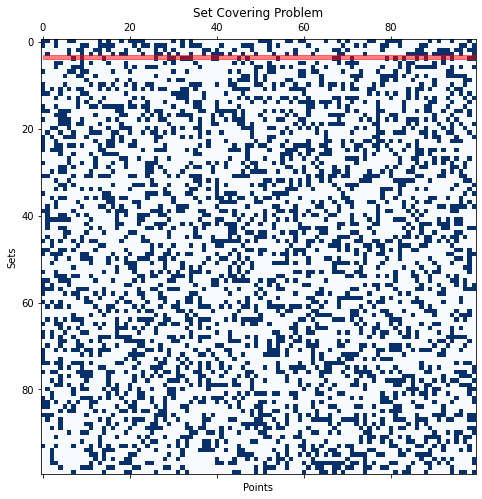

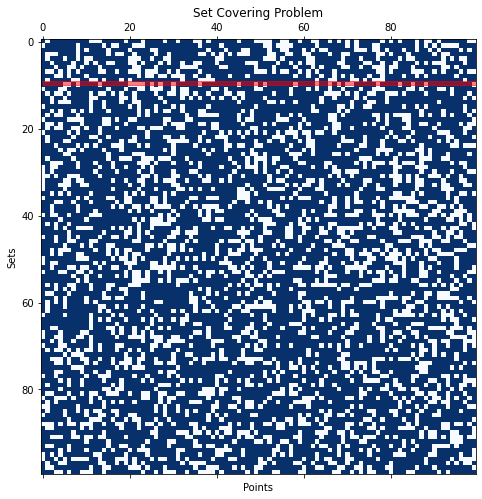

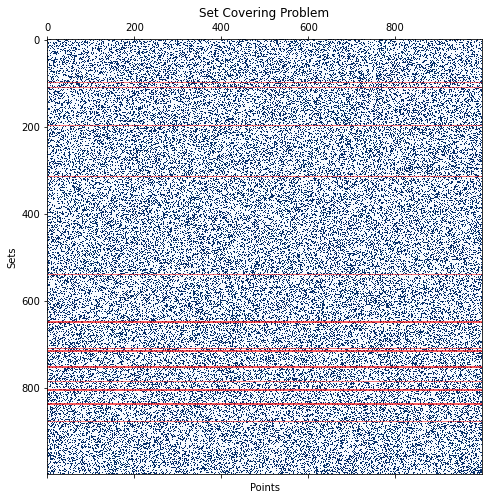

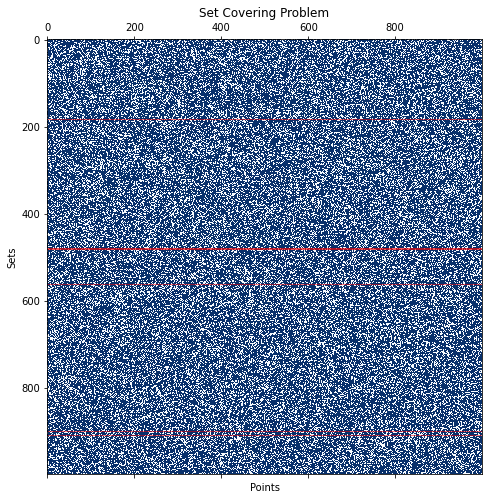

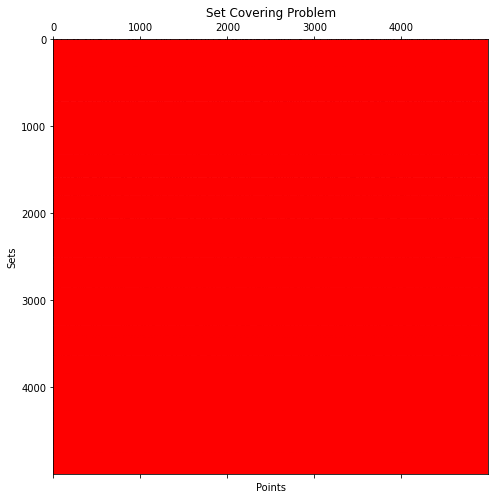

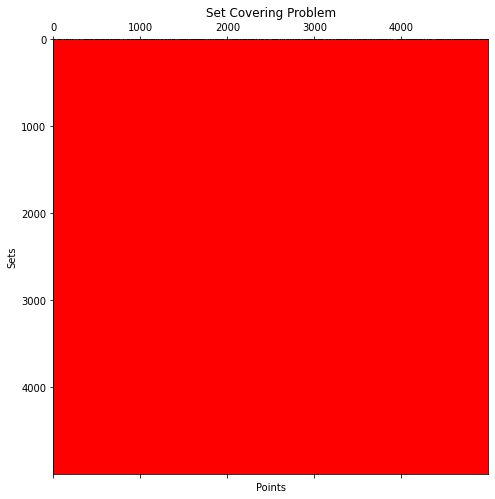

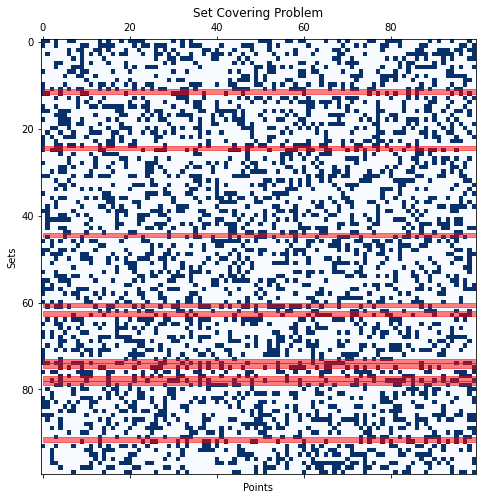

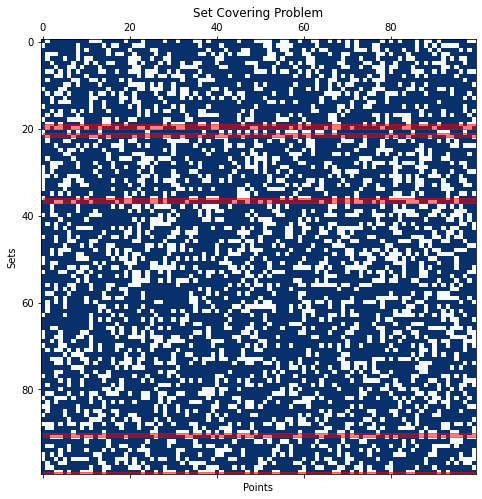

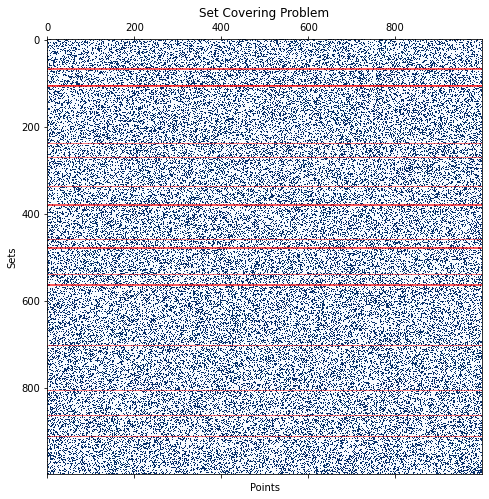

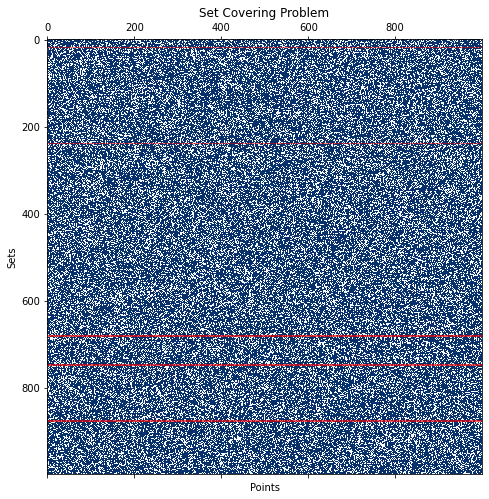

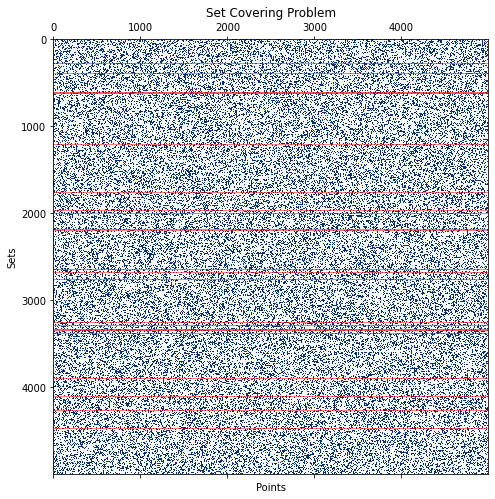

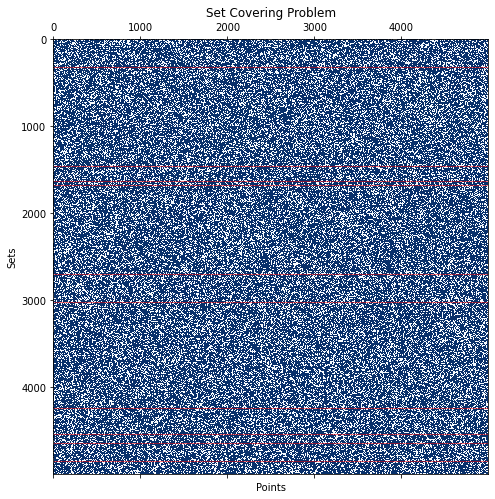

In [69]:
num_points_list = [100, 1_000, 5_000]
density_list = [0.3, 0.7]

results = {}
plot_data = []
best_fitness = float('inf')
resets = 0

# Define a dictionary of algorithms and their parameters
algorithms = {
    'Simulated Annealing': {
        'function': simulated_annealing,
        'params': {'initial_temp': 1000, 'cooling_rate': 0.99, 'max_iter': 1000}
    },
    'Iterated Local Search': {
        'function': iterated_local_search,
        'params': {'max_iter': 1000, 'perturbation_strength': 5}
    }
}

# Loop through the algorithms
for algo_name, algo_data in algorithms.items():
    print(f"Running {algo_name}...")
    results[algo_name] = {}
    for num_points in num_points_list:
        results[algo_name][num_points] = {}
        for density in density_list:
            sets = make_set_covering_problem(num_points, num_points, density)
            best_solution = None
            best_fitness = float('-inf')
            fitness_calls_list = []
            resets = 0
            for _ in range(10):
                solution, fitness_calls = algo_data['function'](sets, num_points, **algo_data['params'])
                fitness_value = fitness(solution, sets.todense().astype(np.bool_), num_points)
                fitness_calls_list.append(fitness_calls)
                if fitness_value > best_fitness:
                    best_fitness = fitness_value
                    best_solution = solution
                    resets += 1
            avg_fitness_calls = mean(fitness_calls_list)
            print(f"num_points: {num_points}, density: {density}, best solution size (state cost): {len(best_solution)}, best fitness: {best_fitness}, average fitness calls: {avg_fitness_calls}, resets: {resets}")
            results[algo_name][num_points][density] = {
                'best_solution': best_solution,
                'best_fitness': best_fitness,
                'avg_fitness_calls': avg_fitness_calls,
                'resets': resets
            }
            plot_data.append((sets, best_solution, num_points))

# Plot all solutions
for sets, best_solution, num_points in plot_data:
    plot_solution(sets, best_solution, num_points)